In [1]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
#generate the sample
def gen_data():
    mu = 0
    sigma =1
    N=2000
    x = np.random.normal(loc=mu, scale=sigma, size=N)
    return x,N,mu,sigma

In [3]:
#visualize the guassian process
def gen_llr():
    process = []
    rescale = []
    x,N,mu,sigma = gen_data()
    n0 = 250
    skip = 250

    for n in range(n0,N,skip):
        xn = x[1:n+1]
        process.append(xn.sum())
        rescale.append(xn.var())
        
    return process, mu, sigma, rescale, n0, N, skip


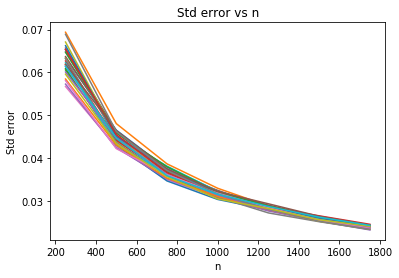

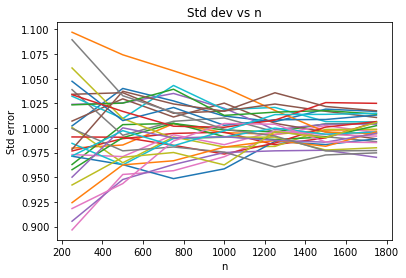

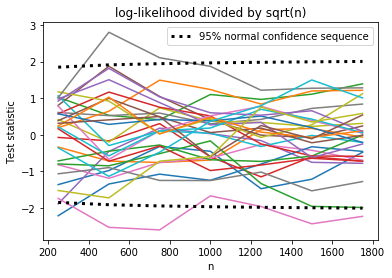

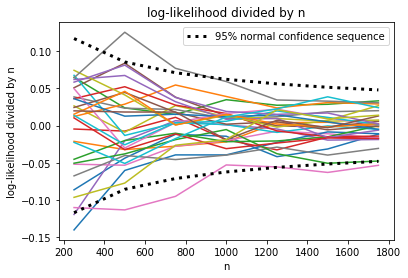

In [4]:
for i in range(30):
    process, mu, sigma, sample_var, n0, N, skip = gen_llr()
    scale = np.arange(n0,N,skip)
    
    std_dev = np.sqrt(np.array(sample_var))
    std_error = std_dev/np.sqrt(scale)
    
    
    
    #std error
    plt.figure(1)
    plt.plot(scale, std_error )
    
    #std dev
    plt.figure(2)
    plt.plot(scale, std_dev )

    #scale by std error (convergence in distribution)
    plt.figure(3)
    plt.plot(scale,  process/(std_error*scale))
    
    
    #scale by n (convergence in probability)
    plt.figure(4)
    plt.plot(scale,  process/(std_dev*scale))
    


#plot 1
plt.figure(1)
plt.title("Std error vs n")
plt.ylabel("Std error")
plt.xlabel("n")
plt.savefig("figs/std_error0")

#plot 2
plt.figure(2)
plt.title("Std dev vs n")
plt.ylabel("Std error")
plt.xlabel("n")
plt.savefig("figs/std_dev0")

#plot 3
plt.figure(3)
plt.title("log-likelihood divided by sqrt(n)")
plt.ylabel("Test statistic")
plt.xlabel("n")

n0=500

#sequence
conf_seq = np.sqrt((scale+n0)*(6 + np.log(scale/n0+1))/scale)
conf_seq = np.sqrt(2*np.log(np.log(scale)))
plt.plot(scale, conf_seq,  color='black', linewidth=3, linestyle=":",
         label="95% normal confidence sequence" )
plt.plot(scale, -conf_seq,  color='black', linewidth=3, linestyle=":")

#critical values (usual)
if False:
    conf_int = 1.96*np.ones(scale.shape[0])
    plt.plot(scale, conf_int ,  color='black', linewidth=3, linestyle="--",  
         label="95% normal confidence interval" )
    plt.plot(scale,-conf_int, color='black', linewidth=3, linestyle="--")


plt.legend()

plt.savefig("figs/ll_rootn0")


#plot 4
plt.figure(4)
plt.title("log-likelihood divided by n")
plt.ylabel("log-likelihood divided by n")
plt.xlabel("n")

plt.plot(scale, conf_seq/np.sqrt(scale),  color='black', linewidth=3, linestyle=":",
         label="95% normal confidence sequence" )
plt.plot(scale, -conf_seq/np.sqrt(scale),  color='black', linewidth=3, linestyle=":")

#critical values (usual)
if False:
    plt.plot(scale, conf_int/np.sqrt(scale) ,  color='black', linewidth=3, linestyle="--",  
         label="95% normal confidence interval" )
    plt.plot(scale,-conf_int/np.sqrt(scale), color='black', linewidth=3, linestyle="--")

plt.legend()

plt.savefig("figs/ll_n0")